In [24]:
import numpy as np
import dask.array as da
from histogramdd import dask_histogramdd

In [25]:
## Random gaussian data in 3 dimensions.
rng = np.random.default_rng(123)
x_np = rng.standard_normal((300000, 3))

## define total number of bins and axes limits:
bins = (5, 7, 6)
ranges = ((-3, 3), (-3.2, 3.2), (-2.9, 2.9))


x_da_3d = da.from_array(x_np, chunks="1 MiB")
x_da_1d = da.from_array(x_np, chunks="1 MiB")

## 1D histogram
h1d, e1d = da.histogram(x_da_1d, bins=bins[0], range=ranges[0])

## 3D histgram
h3d, e3d = dask_histogramdd(x_da_3d, bins=bins, range=ranges)

In [26]:
e1d, e3d

(array([-3. , -1.8, -0.6,  0.6,  1.8,  3. ]),
 [array([-3. , -1.8, -0.6,  0.6,  1.8,  3. ]),
  array([-3.2       , -2.28571429, -1.37142857, -0.45714286,  0.45714286,
          1.37142857,  2.28571429,  3.2       ]),
  array([-2.9       , -1.93333333, -0.96666667,  0.        ,  0.96666667,
          1.93333333,  2.9       ])])

In [27]:
h1d, h3d

(dask.array<sum-aggregate, shape=(5,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>,
 dask.array<sum-aggregate, shape=(5, 7, 6), dtype=float64, chunksize=(5, 7, 6), chunktype=numpy.ndarray>)

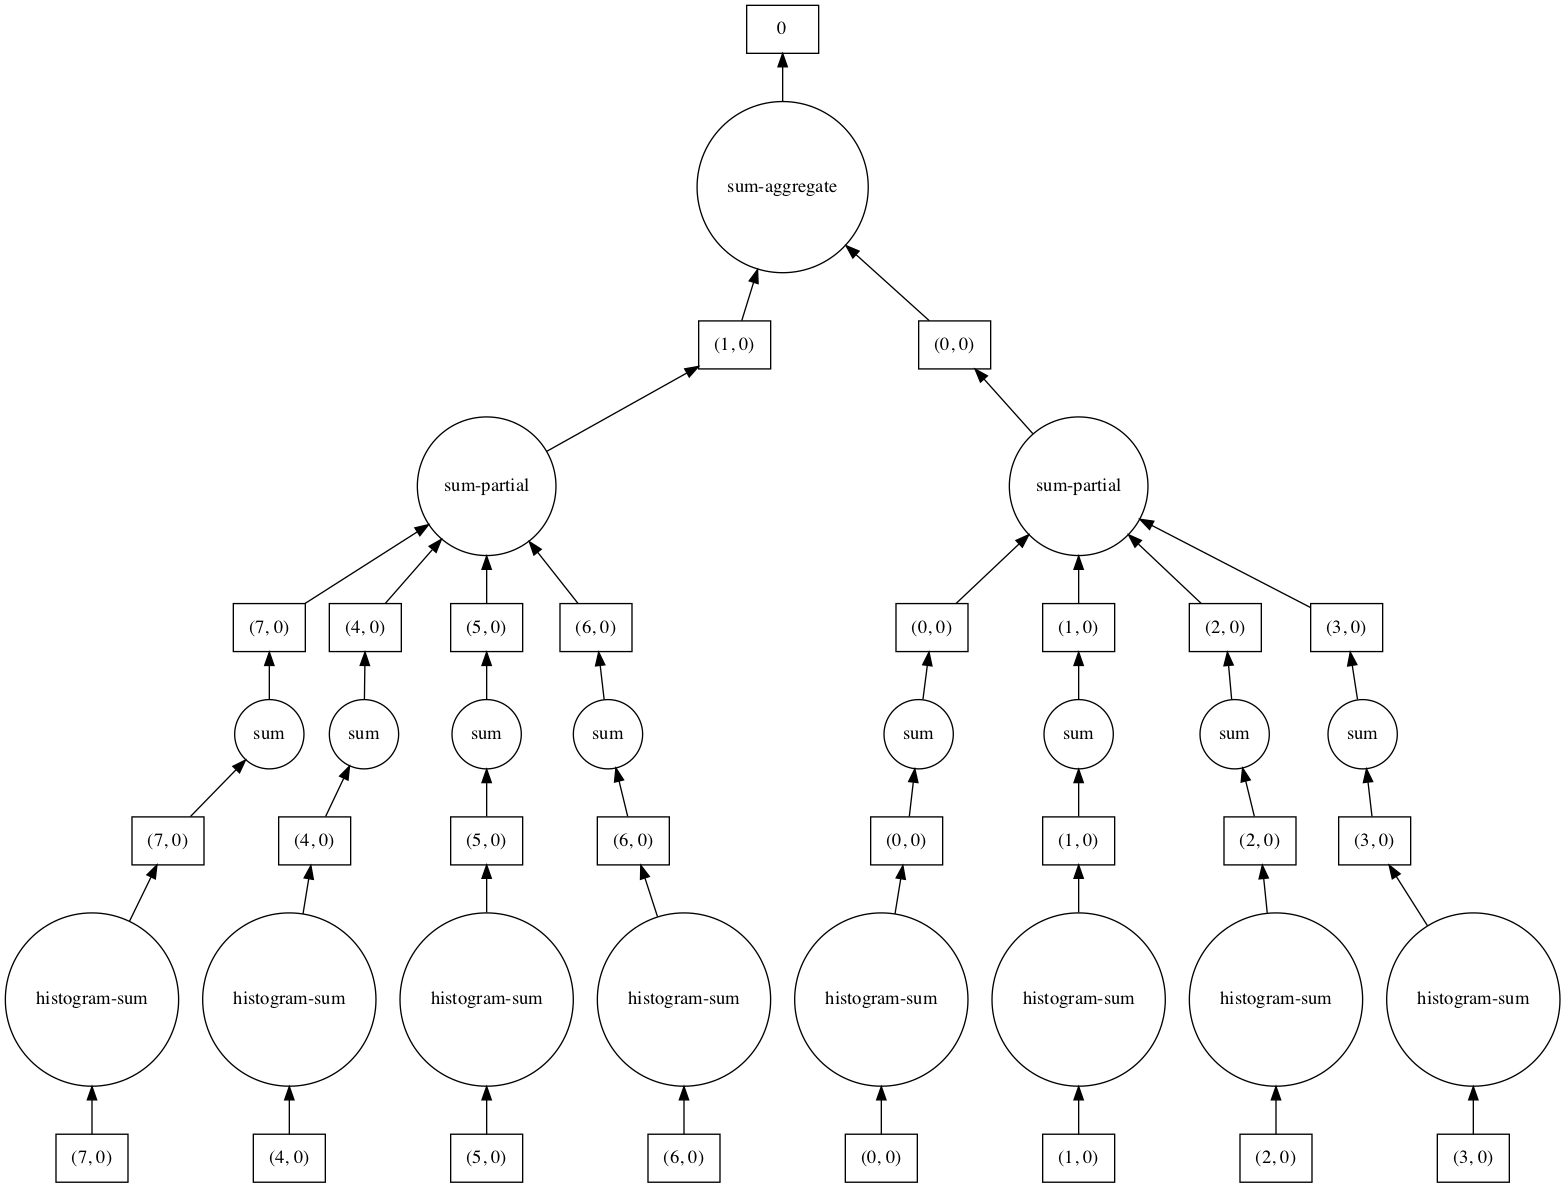

In [28]:
h1d.visualize()

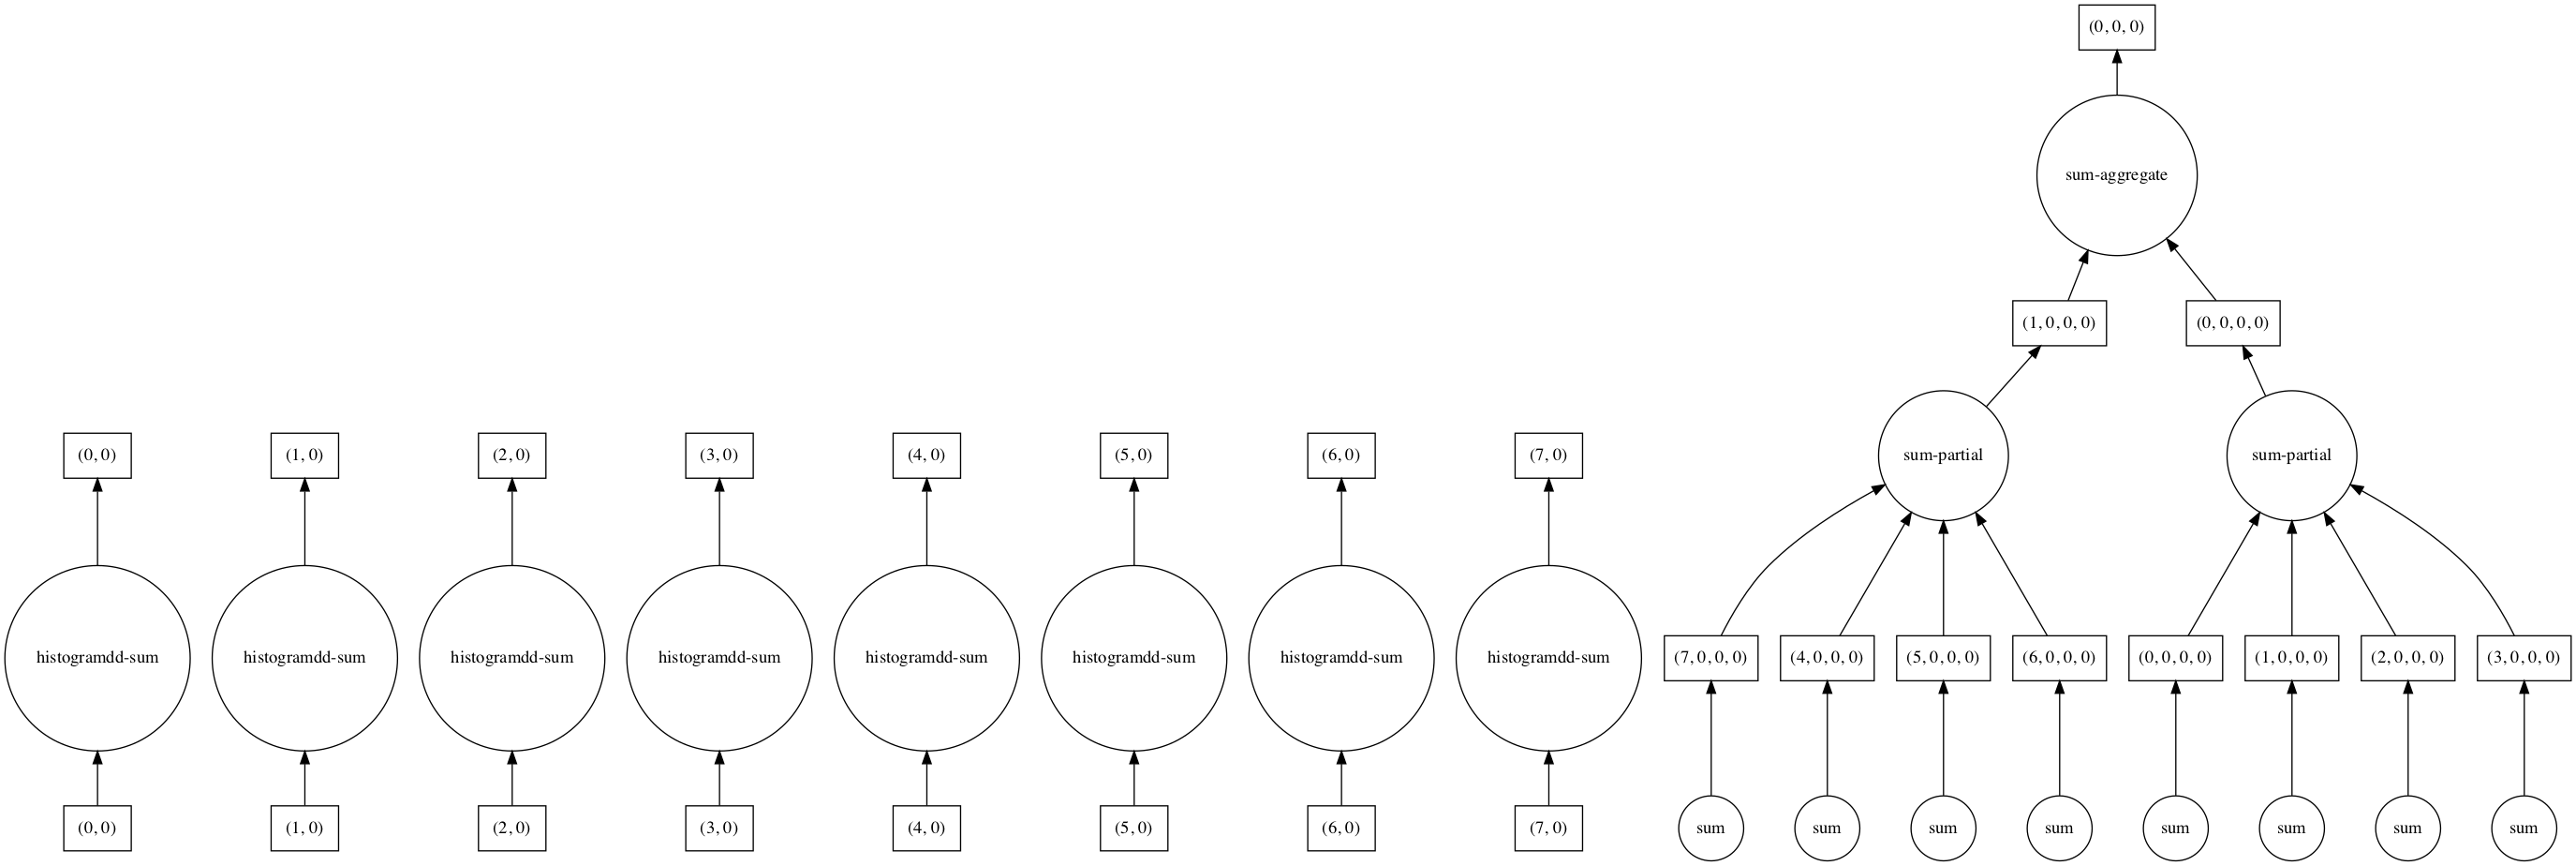

In [29]:
h3d.visualize()